## Titanic - Machine Learning from Disaster ( kaggel Competition )

### The competition is use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
### تستخدم المسابقة التعلم الآلي لإنشاء نموذج يتنبأ بالركاب الذين نجوا من حطام سفينة تيتانيك.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv(r'C:\Users\Ahmed\Downloads\train.csv')
data2=pd.read_csv(r'C:\Users\Ahmed\Downloads\test.csv')

## 1- Explore Data ... استكشاف البيانات

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
ss=data.isnull().sum()
ss[ss>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

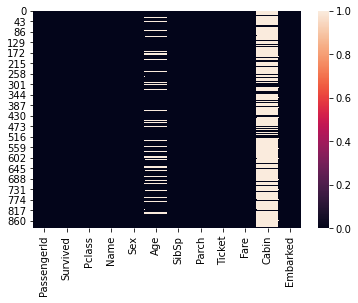

In [9]:
sns.heatmap(data.isnull())

## 2- Cleaning Data ... تنظيف البيانات

In [10]:
def clean(df):
    df.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)
    df.Age=df.Age.fillna(df.Age.median())
    df.dropna()
    return df

In [11]:
clean(data)
clean(data2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


<AxesSubplot:>

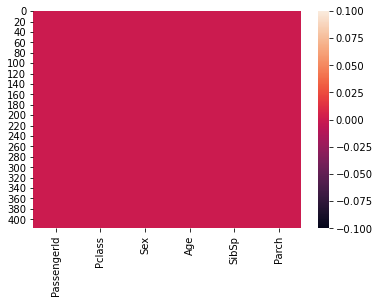

In [12]:
sns.heatmap(data2.isnull())

## 3- Data Analysis ...  تحليل البيانات

<AxesSubplot:>

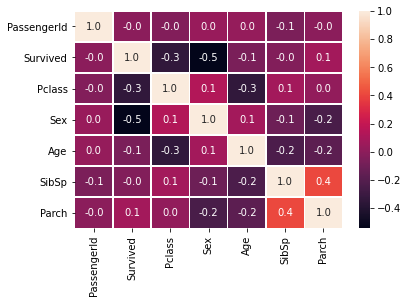

In [42]:
rel=data.corr()                                      ## relation between data 
sns.heatmap(rel,annot=True,fmt='.1f',linewidth=.5)   ## العلاقة بين البيانات وبعضها

<AxesSubplot:ylabel='Sex'>

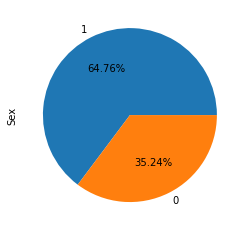

In [41]:
data.Sex.value_counts().plot.pie(autopct = "%0.2f%%") 
# perc between male & femal .. نسبة الرجال والنساء من الركاب

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

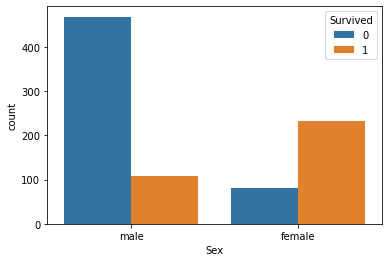

In [16]:
sns.countplot(data.Sex,data=data,hue=data.Survived)
# ٍSurvived from male and femal .. نسب الوفاة والحياة بناءا على جنس الركاب ( رجال ونساء )

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

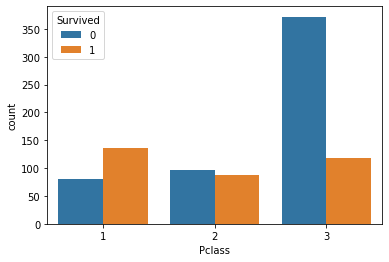

In [17]:
sns.countplot(data.Pclass,data=data,hue=data.Survived) 
# ٍSurvived from passengers classes .. نسب الوفاة والحياة موقع الركاب فى السفينة 

<AxesSubplot:xlabel='Age', ylabel='Count'>

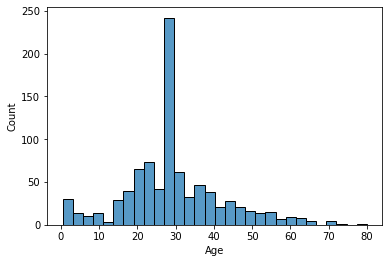

In [45]:
sns.histplot(data.Age)
# Show the Deffirent Ages of passengers .. اعمار الركاب ( المتوسط مابين 20:30)

## 4- Processing Data

In [19]:
data.Sex=pd.get_dummies(data.Sex,drop_first=True)
data2.Sex=pd.get_dummies(data.Sex,drop_first=True)

In [20]:
data2.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
20,912,1,1,55.0,1,0
318,1210,3,0,27.0,0,0
50,942,1,1,24.0,1,0
392,1284,3,1,13.0,0,2
410,1302,3,1,27.0,0,0


## 5- Creat model

In [21]:
accuracies=[] 

In [22]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [24]:
def all(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    print('Accuracy is : ',accuracy)
    accuracies.append(accuracy)
    

In [32]:
Algorithm=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifie','KNeighborsClassifier',
          'GaussianNB','SVC']

In [25]:
model1=LogisticRegression(max_iter=100)
all(model1)

Accuracy is :  0.8491620111731844


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
model2=RandomForestClassifier()
all(model2)

Accuracy is :  0.8324022346368715


In [27]:
model3=GradientBoostingClassifier()
all(model3)

Accuracy is :  0.8603351955307262


In [28]:
model4=DecisionTreeClassifier()
all(model4)

Accuracy is :  0.7318435754189944


In [29]:
model5= KNeighborsClassifier()
all(model5)

Accuracy is :  0.5139664804469274


In [30]:
model6=GaussianNB()
all(model6)

Accuracy is :  0.7932960893854749


In [31]:
model7=SVC()
all(model7)

Accuracy is :  0.659217877094972


In [33]:
new=pd.DataFrame({'Algorithm':Algorithm,'Score':accuracies})
new

,Algorithm,Score
0,LogisticRegression,0.849162
1,RandomForestClassifier,0.832402
2,GradientBoostingClassifier,0.860335
3,DecisionTreeClassifie,0.731844
4,KNeighborsClassifier,0.513966
5,GaussianNB,0.793296
6,SVC,0.659218


### Best Algorithm .. أفضل خوارزمية GradientBoostingClassifier 

In [34]:
last_model=GradientBoostingClassifier()
last_model.fit(x_train,y_train)


GradientBoostingClassifier()

In [48]:
lpre=last_model.predict(data2) # الاختبار على البيانات الموجودة فى شيت data2

In [36]:
final=data2.PassengerId        # تحديد المعرف الخاص بالأكواد المطلوب التنبؤ بها

In [37]:
  df=pd.DataFrame({'PassengerId':final,'Survived':lpre}) # وضع المعرف بالأكواد المطلوب التنبؤ بها مع التوقع لداتا2

In [38]:
df .to_csv('submission.csv',index=False) # استخراج نتيجة المشروع فى صورة ملف csv